# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
!pip install palmerpenguins

In [ ]:
# Code Here
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# import + print first few rows
penguins_df = load_penguins()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
# new table with categorical dummies
# categorical variables - species, island, sex, year
penguins = pd.get_dummies(penguins_df)
penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
penguins_df.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Drop rows with any NaN values from the dummified DataFrame
penguins_cleaned = penguins.dropna()

X = penguins_cleaned.drop(columns=['bill_depth_mm'])
y = penguins_cleaned['bill_depth_mm']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Models ---
# 1. Multiple Linear Regression Model
linear_reg_pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
linear_reg_pipeline.fit(X_train, y_train)

# 2. kNN Models (two different values of K)
knn_pipeline_k5 = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=5)
)
knn_pipeline_k5.fit(X_train, y_train)

knn_pipeline_k10 = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=10)
)
knn_pipeline_k10.fit(X_train, y_train)

# 3. Decision Tree Model
decision_tree_pipeline = make_pipeline(
    StandardScaler(), # StandardScaler is not strictly necessary for Decision Trees but can be included for consistency
    DecisionTreeRegressor(random_state=42)
)
decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
# --- Calculate Errors ---
models = {
    "Linear Regression": linear_reg_pipeline,
    "kNN (K=5)": knn_pipeline_k5,
    "kNN (K=10)": knn_pipeline_k10,
    "Decision Tree": decision_tree_pipeline
}

results = []

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    results.append({
        "Model": name,
        "Training RMSE": train_rmse,
        "Test RMSE": test_rmse
    })

results_df = pd.DataFrame(results)
print(results_df)

               Model  Training RMSE  Test RMSE
0  Linear Regression       0.785860   0.749885
1          kNN (K=5)       0.670177   0.850538
2         kNN (K=10)       0.735993   0.836029
3      Decision Tree       0.000000   1.036088


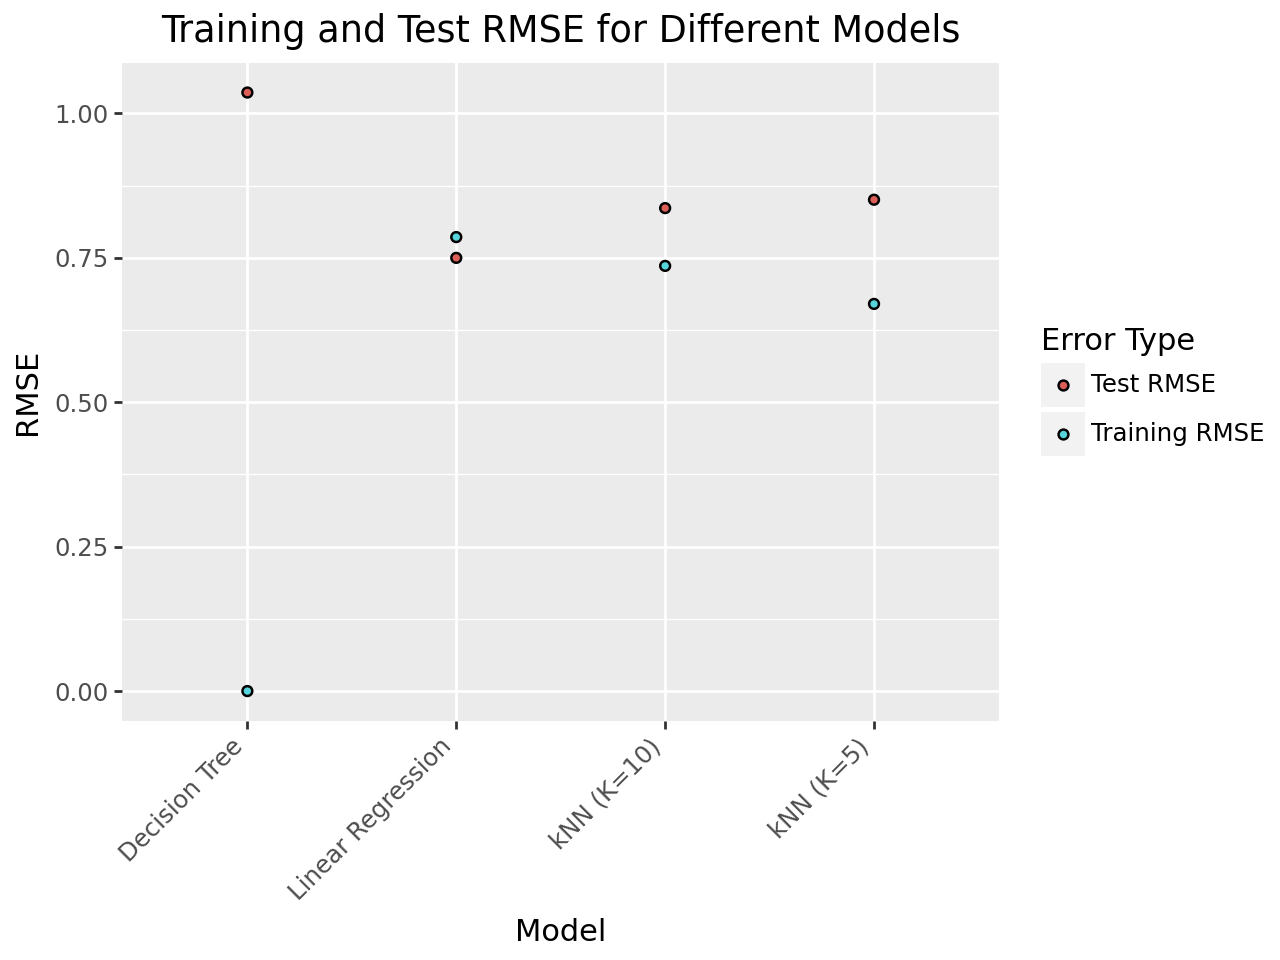

In [ ]:
from plotnine import *

# Prepare data for plotting (already done, just re-referencing)
plot_data = results_df.melt(id_vars='Model', var_name='Error Type', value_name='RMSE')

# Create the plotnine bar plot
plot = (ggplot(plot_data, aes(x='Model', y='RMSE', fill='Error Type'))
        + geom_point()
        + labs(title='Training and Test RMSE for Different Models',
               y='RMSE',
               x='Model')
        + theme(axis_text_x=element_text(rotation=45, hjust=1)))

plot

In [ ]:
# Determine the best model based on Test RMSE
best_model_test_rmse = results_df.loc[results_df['Test RMSE'].idxmin()]
print(f"\nBest model based on Test RMSE: {best_model_test_rmse['Model']} with Test RMSE of {best_model_test_rmse['Test RMSE']:.3f}")


Best model based on Test RMSE: Linear Regression with Test RMSE of 0.750
